### Normalization  -- MinMaxScaler
MinMaxScaler normalization technique is used to rescale the features with a distribution value betweeen 0 and 1.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
df = pd.read_csv("train.csv")
df.drop(['id'], axis=1, inplace=True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.05,0.40,2.40,21.68,71.79,2.33,1.87,0.09,1.30,1.070000,1.13,2.45,96.79,1
1,13.01,3.66,2.21,16.53,98.87,2.46,2.34,0.28,1.49,3.690000,0.75,2.79,588.86,0
2,13.13,1.14,2.32,18.75,108.51,2.63,2.26,0.13,2.15,5.030000,0.86,2.66,954.80,0
3,12.06,1.41,2.04,16.58,73.52,0.84,-0.36,0.37,0.14,7.869999,0.37,1.01,194.88,2
4,12.35,1.14,1.91,19.52,77.65,2.09,1.98,0.27,1.03,4.620000,1.11,3.46,502.23,1


In [49]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Observation : there are no missing values in the dataset

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       534 non-null    float64
 1   malic_acid                    534 non-null    float64
 2   ash                           534 non-null    float64
 3   alcalinity_of_ash             534 non-null    float64
 4   magnesium                     534 non-null    float64
 5   total_phenols                 534 non-null    float64
 6   flavanoids                    534 non-null    float64
 7   nonflavanoid_phenols          534 non-null    float64
 8   proanthocyanins               534 non-null    float64
 9   color_intensity               534 non-null    float64
 10  hue                           534 non-null    float64
 11  od280/od315_of_diluted_wines  534 non-null    float64
 12  proline                       534 non-null    float64
 13  targe

Observation : all the features in the dataset are numerical features.

### Visualization of input features

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

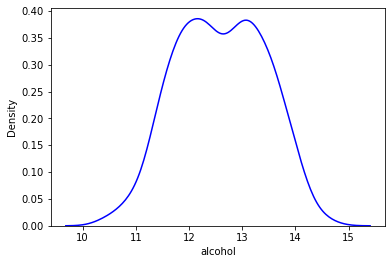

In [51]:
sns.kdeplot(df['alcohol'], color='b')

<AxesSubplot:xlabel='malic_acid', ylabel='Density'>

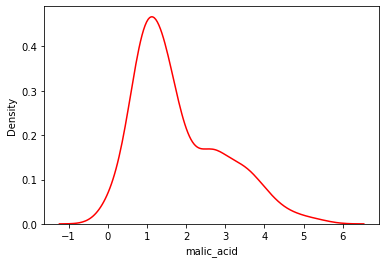

In [52]:
sns.kdeplot(df['malic_acid'], color='r')

<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>

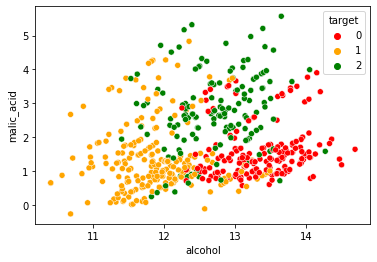

In [53]:
color_dict = {0:'red', 1:'orange', 2:'green'}
sns.scatterplot(df['alcohol'], df['malic_acid'], hue=df['target'], palette=color_dict)

#### Splitting the data into training and test data

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], 
                                                      test_size=0.2,
                                                      random_state=0)
print(x_train.shape)
print(x_test.shape)

(427, 13)
(107, 13)


In [55]:
scaler = MinMaxScaler()
scaler.fit(x_train)  # fit the scaler on the training data so that it can learn the parameters
x_train_scaled = scaler.transform(x_train)  # transforming the training data
x_test_scaled = scaler.transform(x_test)    # transforming the testing data
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)    # converting the received numpy array to dataframe
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)    # converting the received numpy array to dataframe

In [56]:
np.round(x_train.describe(),1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0
mean,12.6,1.8,2.2,17.9,92.2,2.0,1.5,0.3,1.3,3.9,0.8,2.3,586.6
std,0.8,1.1,0.3,3.5,14.4,0.7,1.1,0.1,0.6,2.4,0.2,0.8,329.6
min,10.4,-0.3,1.2,8.0,58.0,0.6,-0.5,0.0,-0.2,-0.2,0.4,0.6,9.8
25%,11.9,1.0,2.1,15.7,81.2,1.5,0.5,0.2,0.9,2.1,0.7,1.6,346.7
50%,12.5,1.5,2.2,17.9,90.7,2.0,1.6,0.3,1.3,3.7,0.9,2.4,502.2
75%,13.2,2.6,2.4,19.9,100.3,2.5,2.4,0.4,1.6,5.1,1.0,2.9,803.3
max,14.7,5.6,3.2,28.7,159.5,3.8,4.4,0.6,3.4,11.4,1.6,3.9,1625.4


In [57]:
np.round(x_train_scaled.describe(),1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0,427.0
mean,0.5,0.4,0.5,0.5,0.3,0.4,0.4,0.5,0.4,0.4,0.4,0.5,0.4
std,0.2,0.2,0.1,0.2,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.4,0.2,0.4,0.4,0.2,0.3,0.2,0.3,0.3,0.2,0.3,0.3,0.2
50%,0.5,0.3,0.5,0.5,0.3,0.4,0.4,0.4,0.4,0.3,0.4,0.5,0.3
75%,0.7,0.5,0.6,0.6,0.4,0.6,0.6,0.6,0.5,0.5,0.6,0.7,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Observation : min for all the features is 0 and max for all the features is 1. All the features are rescaled between 0 and 1.

Text(0.5, 1.0, ' After Scaling ')

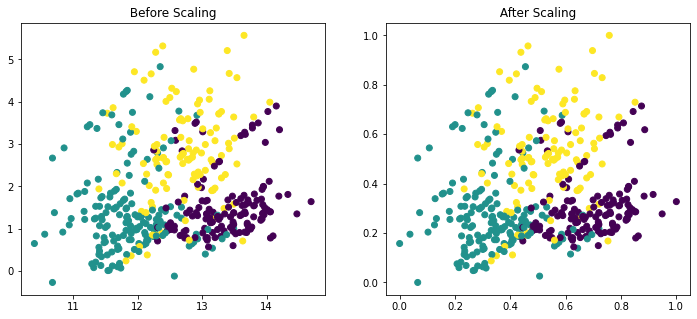

In [58]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['alcohol'], x_train['malic_acid'], c=y_train)
ax1.set_title(" Before Scaling ")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['malic_acid'], c=y_train)
ax2.set_title(" After Scaling ")

Observation : from the two scatter plots it is clear that while retaining the original form of data, it is compressed and made to fit in a unit rectangle.

<AxesSubplot:title={'center':' After Scaling '}, xlabel='alcohol', ylabel='Density'>

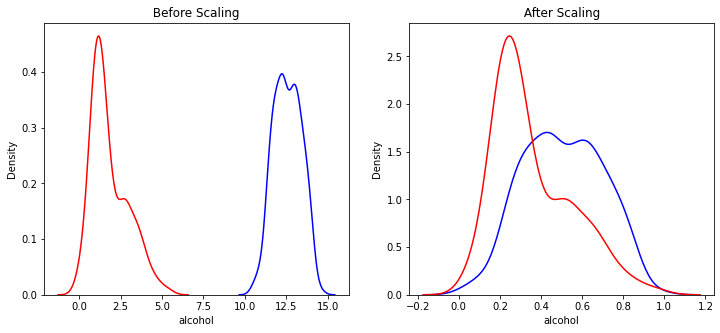

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title(" Before Scaling ")
sns.kdeplot(x_train['alcohol'], ax=ax1, c='b')
sns.kdeplot(x_train['malic_acid'], ax=ax1, c='r')
 
ax2.set_title(" After Scaling ")
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2, c='b')
sns.kdeplot(x_train_scaled['malic_acid'], ax=ax2, c='r')



Observation : After scaling both the features are in the same range.

### Visualizing the effect  of normalization on distribution of features --

<AxesSubplot:title={'center':' Alcohol distribution after scaling '}, xlabel='alcohol', ylabel='Density'>

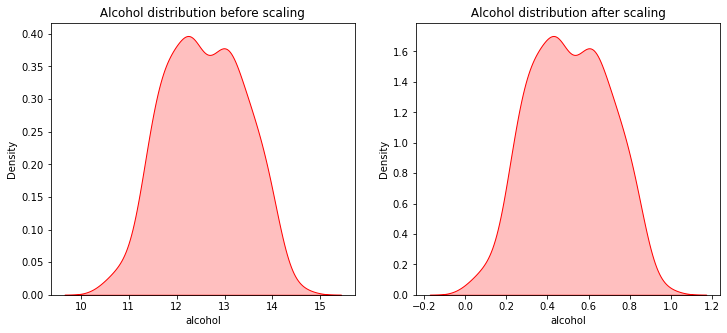

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title(" Alcohol distribution before scaling ")
sns.kdeplot(x_train['alcohol'], ax=ax1, color='red', shade=True)
ax2.set_title(" Alcohol distribution after scaling ")
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2, color='red', shade=True)

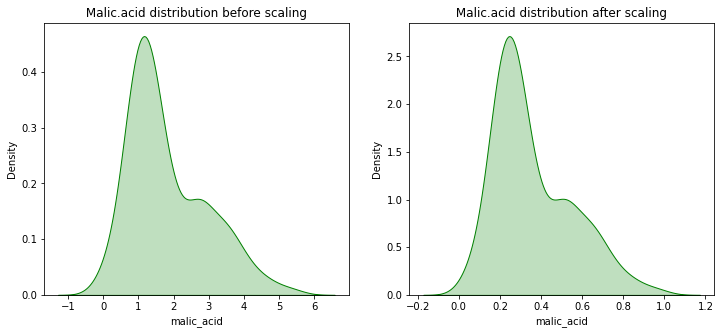

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title(" Malic.acid distribution before scaling ")
sns.kdeplot(x_train['malic_acid'], ax=ax1, color='green', shade=True)
ax2.set_title(" Malic.acid distribution after scaling ")
sns.kdeplot(x_train_scaled['malic_acid'], ax=ax2, color='green', shade=True)
plt.show()

#### Observation : From above plots it is clear that the distribution of data is not changed by the normalization process.

### Effect of Normalization on Model Performance

In [62]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)
print(" Accuracy with normal data : ", accuracy_score(y_test, y_pred)*100)
print(" Accuracy with scaled data :", accuracy_score(y_test, y_pred_scaled)*100)

 Accuracy with normal data :  93.45794392523365
 Accuracy with scaled data : 97.19626168224299
